# **Black Scholes og geometrisk brownsk bevegelse - modelleringsprosjekt**
Laget av Christian Husby

# Hensikt

I dette prosjektet skal jeg utforske den matematiske Black-Scholes modellen. Jeg skal se på hvordan Geometrisk brownsk bevegelse er en forutsetning for Black-Scholes modellen. Jeg skal også utforske verdiforholdet mellom en aksjepris og en opsjon gjennom en differensiallikning. 

# Teori

## Geometrisk Brownsk bevegelse

Black-Scholes-modellen forutsetter at prisen til en bestemt aksje følger en geometrisk Brownsk bevegelse. En geometrisk Brownsk bevegelse er en stokastisk prosess der prisen vokser eller faller over tid. Prisen $S$ ved tiden $t$ er definert slik:

$$
S(t) = S(0) \cdot e^{\left( \mu - \frac{1}{2}\sigma^2 \right)t + \sigma B(t)}
$$

Der:
- $S(t)$: verdien på aksjen ved tid $t$
- $S(0)$: startverdien
- $\mu$: drift, altså forventet vekstrate for aksjen
- $\sigma$: volatilitet (et mål på usikkerheten i aksjeprisen)
- $B(t)$: en Wiener-prosess (en tilfeldig, kontinuerlig bevegelse der hvert steg er uavhengig av tidligere steg og normalt fordelt)

Modellen forutsier at  $\mu$(drift) og  $\sigma$(volatilitet) er konstant. Volatilitet er et mål på hvor mye og hvor raskt en aksje svinger over tid. En aksje som har store svingninger i aksjeprisen vil ha en større volatilitet enn en aksje som svinger lite.

Modellen vil få en gjennomsnittlig positiv utvikling hvis drift er positiv. Man kan tenke seg at utviklingen har lik sjanse for å gå opp eller ned, men den forventede driften blir addert. Slik har utviklingen en systematisk bias i drift sin retning(enten positiv eller negativ).

Leddet $B(t)$ representerer det tilfeldige i modellen. Leddet kommer fra Wiener-prossessen som ble oppfunnet av Norbert Wiener. Når vi skal simulere en Wiener-prosess i python, er det vanlig å bruke en variabel Z, som henter tilfeldige tall som er standard normalt distributert med gjennomsnitt 0 og standardavvik 1. Verdiene kan både være negativ og positiv. Den standard normalfordelte funksjonen kan sammenlignes med kast av to terninger. Hver gang du kaster skriver du opp summen av de to tallene du fikk fra terningene. hvis du kaster mange nok ganger vil du se at du vil få flere kast med sum på 7 enn 2. Det er fordi det er flere kombinasjoner som kan bli til 7 enn 2. F.eks. 1+6, 2+5, 4+3 osv. Dette er det samme prinsippet som danner den normalfordelte funksjonen. Den normale verdien vil være oftere nær 0 enn høye verdier på grunn av standard normal distribusjon. Visualiseringen under viser sannsynlighet for verdier ligger innenfor de bestemte intervallene. sannsynlighet for at verdiene ligger innenfor intervallene er sentralt i utregningen i Black-Scholes modellen.

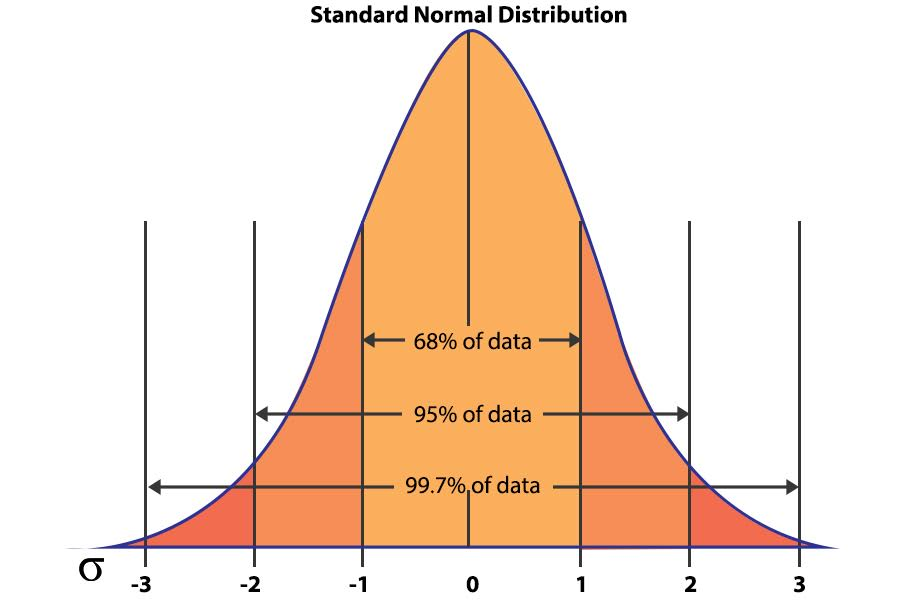

[Standard Normal Distribution - QuantInsti](https://quantra.quantinsti.com/glossary/Standard-Normal-Distribution)

En geometrisk brownsk bevegelse er rimelig realistisk modell å bruke til prosjektet. Modellen bruker eksponentiell faktor, som gjør at prisen alltid vil være positiv. Dette er realistisk da en aksjepris aldri kan bli mindre enn 0. Volatilitet vil også være proporsjonalt med prisen til aksjen. Hvis aksjen koster mye vil prisen svinge mer enn en billig aksje. Modellen tar for seg at prisutviklingen er uavhengig fra en tid til en annen. Altså det som skjedde med prisen i går har ingen påvirkning på hva som vil skje i dag. Dette kan være en svakhet til denne modellen. Hvis aksjen falt 5% i går, er det urealistisk at sannsynligheten for å gå opp eller ned er lik i dag. Etter stor endring i aksjeprisen, er det vanlig å se reversinger, altså at prisen går tilbake til det den var før endringen. Modellen er også strengt teoretisk og tar ikke hensyn til nyheter, historikk eller selskapets regnskap. Modellen er ikke perfekt, men det er et godt ugangspunkt for å simulere prisutvikling. Den er også relevant da geometrisk brownsk bevegelse er en forutsetning for Black-Scholes modellen.



## Black-Scholes-modellen

Black-Scholes-modellen brukes for å estimere den rettferdige prisen på en europeisk opsjon. En opsjon gir deg rett, men ikke plikt, til å kjøpe en aksje på et senere tidspunkt til en forhåndsbestemt pris. I en europeisk opsjon kan denne retten kun benyttes på siste dag av opsjonens løpetid.

Man betaler en sum for retten til å kjøpe aksjen senere. Hvis aksjekursen har steget mer enn prisen man betalte for opsjonen (i en call-opsjon) og strike price, har man tjent penger. Man kan spekulere i både oppgang og nedgang, men i dette prosjektet fokuserer jeg på call-opsjoner – altså at man forventer aksjen vil stige i verdi. Jeg skal også drøfte litt om hvordan denne modellen kan brukes til hedging i en portefølje. 

Black-Scholes PDE er en partial differensialliking(PDE) som beskriver utviklingen i opsjonsprisen $V(S,t)$, som funksjon av aksjepris $S$ og tid $t$. Differensiallikningen kan skrives slik:
$$ \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV = 0 $$

Det vil være hensiktsmessig i dette prosjektet å bruke den eksakte løsningen på likningen da jeg bare er interessert i opsjonsprisen på et bestemt tidspunkt.

Den rettferdige prisen på opsjonen, ifølge den eksakte Black-Scholes-modellen, er gitt ved:

$$
C = S_0 N(d_1) - K e^{-rt} N(d_2)
$$

Her er:
- $C$: prisen på opsjonen (call-opsjonen), ofte kalt premium
- $S_0$: aksjens pris ved kjøpstidspunktet
- $K$: strike price – prisen man har rett til å kjøpe aksjen for
- $r$: risikofri rente (risk-free interest rate). Dette er den forventede gevinsten fra en investering uten risiko. Ofte brukes amerikanske statsobligasjoner som referanse, da de regnes som helt sikre.
- $t$: tid til forfall
- $N(d_1)$ og $N(d_2)$ er verdier hentet fra den kumulative fordelingsfunksjonen til en standard normalfordeling.

Disse verdiene brukes i Black-Scholes-formelen for å ta høyde for sannsynligheten for at opsjonen ender opp "in the money", altså at den gir gevinst.


Følgende gjelder for $d_1$ og $d_2$:

$$
d_1 = \frac{\ln\left( \frac{S_0}{K} \right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}}, \quad
d_2 = d_1 - \sigma \sqrt{t}
$$

den kumulative fordelingsfunksjonen er arealet under grafen til den standard normalt distributerte grafen. Vi får da en sannsynlighet for at variabelen er mindre enn eller lik den verdien den har. Denne verdien vi får er målt i standardavvik, da det er avstanden fra gjennomsnittsverdien, som er 0. d1 vil gi oss et mål på hvor mye over eller under opsjonen vil ligge i forhold til strike price K med hensyn til tid, rente og volatilitet. d2 gir en mer direkte statistisk sannsynlighet for at prisen vil være over strike price.

Black-Scholes modellen er en viktig modell som brukes mye til introdusering til finans-matematikk. Modellen har både fordeler og svakheter. Modellen er effektiv og gir en direkte pris på opsjonen. Den gir innsikt i hvordan de ulike parameterne påvirker opsjonsverdien. Derimot, en av de største svakhetene til modellen er at den antar konstant volatilitet. I et realistisk marked vil volatiliteten til en aksje variere mye over tiden. I markeder med mye variasjon i volatilitet vil modellen derfor gi et mindre troverdig svar. Modellen funker strengt tatt også bare for europeiske opsjoner, altså at de bare kan innløses ved forfall. Modellen antar også at det ikke er transaksjonskostnader. Modellen har begrensninger men egner seg bra til dette prosjektet. 

## Eulers metode

Eulers metode er en numerisk tilnærming som brukes for å finne løsning på ordinære differensiallikninger(ODE). Vi har en startverdi $f(x_0)$ og vil finne $f(x_0+dx)$. for å finne $f(x_0+dx)$ bruker vi den numeriske definisjonen av den deriverte med $dx(Δx)$ så liten som mulig. Definisjonen av den deriverte er beskrevet slik: 
$$
f'(x) \approx \frac{f(x + dx) - f(x)}{dx}
$$
Vi vet $f(x)$, altså $f(x_0)$. Vi vet også et uttrykk for den deriverte. Det er differensiallikningen vår. tidssteget $dx$ bestemmer vi selv. Dermed er det eneste ukjente i den numeriske tilnærmingen $f(x+dx)$. $f(x+dx)$ er jo nettopp det vi har lyst til å finne, nemlig det neste tidssteget. Vi kan omforme uttrykket slik at det blir uttrykkt med $f(x+dx)$.
For å gjøre dette ganger vi med $dx$ på begge sider:

$f'(x)dx \approx f(x+dx)-f(x)$

Deretter isolere $f(x+dx)$ alene:

$$f(x+dx) \approx f(x)+f'(x)dx$$
Dette uttrykket er definisjonen på Forward Euler metode. Eulers metode er en iterativ algoritme. Det vil si at vi vi finner neste funksjonsverdi med startverdi $f(x_0)$ slik: 

$$f(x_1) \approx f(x_0)+f'(x_0)*Δx$$
$$f(x_2) \approx f(x_1)+f'(x_1)*Δx$$
$$f(x_3) \approx f(x_2)+f'(x_2)*Δx$$

Eulers metode er en effektiv måte å løse ordinære differensiallikinger(ODE) i Python. Den gir en intuitiv forståelse på hvordan man kan løse differensiallikinger, i motsetning til andre modeller. Derimot, egner ikke Eulers metode seg til mine modeller da geometrisk brownsk bevegelse er en stokatisk differensiallikning(SDE), og black scholes modellen er en partiell differensialliking(PDE). Det er mulig å bruke en utvidelse av Eulers metode, nemlig Eulere-Maruyama metoden for å løse SDE-er. Derimot, mener jeg ikke dette er hensiktsmessig når man kan bruke en eksakt løsning av modellen. Dette er begrunnelsen for at jeg har valgt å bruke eksakt løsning av både geometrisk brownsk bevegelse og Black-Scholes modellen. for å implementere Eulers metode, skal jeg derfor utforske en forenkling av Black-Scholes modellen som kan skrives på ordinær differensiallikning-form. 




## Forventet verdi under risikonøytral prising


Under risikonøytral prising antar man at aksjen vokser med den risikofrie renten $r$. Dette gir oss en modell der all fremtidig gevinst blir diskontert tilbake til nåtiden med den risikofrie renten. Den forventede verdien av gevinsten kan forklares med et slikt system av differensiallikninger:

$$
\frac{dy_1}{dS} = y_2
$$

$$
\frac{dy_2}{dS} = \frac{2}{\sigma^2 S^2} \left( ry_1 - rSy_2 \right)
$$

Her er:  
- $y_1(S)$: opsjonens forventede verdi som funksjon av aksjeprisen $S$  
- $y_2(S)$: den deriverte av $y_1$ med hensyn på $S$  
- $\sigma$: volatiliteten i aksjeprisen  
- $r$: risikofri rente  

Systemet er en omskriving av Black-Scholes-likningen som er uavhengig av tiden, der man antar at opsjonsverdien kun avhenger av aksjeprisen $S$ og ikke av tiden $t$. Et slikt system kan være realistisk å bruke hvis tiden ikke er relevant, eller om opsjonen er svært nærme forfall og ikke har tid til å utvikle seg med tiden. Ved å bruke numeriske metoder som Eulers metode, kan man løse dette systemet iterativt og simulere opsjonsverdien for ulike nivåer av aksjepris $S$.

Modellen er en forenkling hvor man ikke tar hensyn til tiden. Dette kan være en svakhet til denne modellen da man ikke får sett hele bildet. På den andre siden, vil det gjøre det lettere å analysere og forstå sammenhengen mellom aksjeprisen og opsjonsverdien. 











# **Resultater og drøfting**

## Geomtrisk Brownsk Bevegelse - simulering av aksjepris






gjennomsnittlig avsluttende aksjepris: 104.86


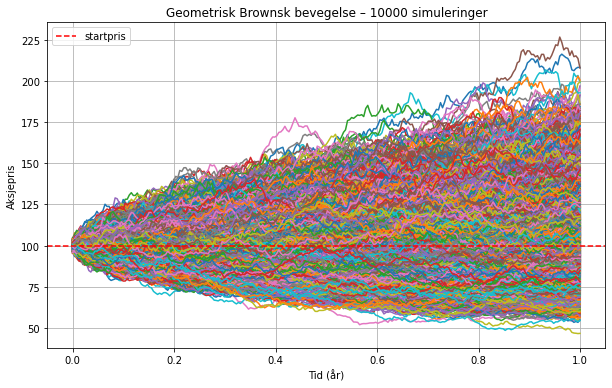

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametere
S0 = 100  #startpris på aksje  
mu = 0.05   #   drift, forventet gevinst
sigma = 0.2   #volatilitet 
T = 1     # time to maturity, målt i år    
N = 252 # antall børsdager i et år. Gir en mer realistisk simulering.      
dt = T / N   # tidssteg
n = 10000  #antall simuleringer

t = np.linspace(0, T, N)


paths = np.zeros((n, N))
for i in range(n):
    
    Z = np.random.normal(0, 1, N)
    W = np.cumsum(np.sqrt(dt) * Z)  # Wiener-prosess
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    paths[i] = S
# beregner gjennomsnittlig avsluttende verdi
siste_pris = paths[:, -1] 
gjennomsnittlig_siste_pris = np.mean(siste_pris)


print('gjennomsnittlig avsluttende aksjepris:', round(gjennomsnittlig_siste_pris,2))




plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot(t, paths[i]) 
plt.axhline(y=100, color='red', linestyle='--', label='startpris')
plt.title('Geometrisk Brownsk bevegelse – 10000 simuleringer')
plt.xlabel('Tid (år)')
plt.ylabel('Aksjepris')

plt.legend()
plt.grid(True)
plt.show()

Simuleringen viser hvordan aksjeprisen utvikler seg gjennom 1 år. Vi har de gitte parameterne startpris, drift, volatilitet og tid. Tidsstegene vil være basert på hvor mange børsdager det er i løpet av et år(børs ikke åpen i helg og helligdager). Da geometrisk brownsk bevegelse er basert på tilfeldighet vil det være relevant og kjøre flere simuleringer for å se en trend. I denne simuleringen har vi en drift på 5%. Dette er en realistisk vekst med tanke på at amerikansk statsobligasjon(10 år) ligger rundt 4.5%. Ut ifra simuleringen kan vi se en generell trend oppover. De fleste simuleringene vil ligge +- 10 fra startprisen. Dette samsvarer med at verdiene er normaltfordelte. Det vil være normalt å få uteliggere som har unormal høy eller lav vekst. Når vi kjører mange nok simuleringer vil gjennomsnittprisen ligge ganske nærme den forventete driften. Vi ser med en startpris på 100 blir gjennomsnittlig avsluttende aksjepris cirka 105. Man kan også se for seg andre tilfeller der parameterne er annerledes. I et scenario hvor drift hadde vært høyere, ville man proporsjonalt sett en høyere gjennomsnittlig vekst i løpet av simuleringen. Med en drift på 0, ville gjennomsnittlig avsluttende aksjepris vært lik startprisen. Man ville hatt like mye tilfeldig bevegelser både oppover og nedover. En økning i volatilitet hadde gitt oss en bredere spredning i de individuelle aksjebanene. Volatiliteten gjør utviklingen mer uforutsigbar, og man vil se både høyere og lavere utfall. 

## Geometrisk brownsk bevegelse med P/L

premium: 6.04


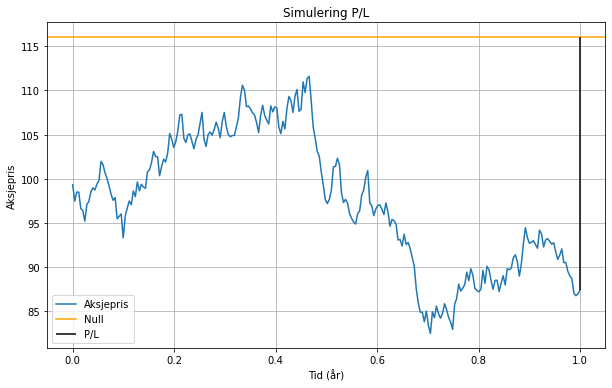

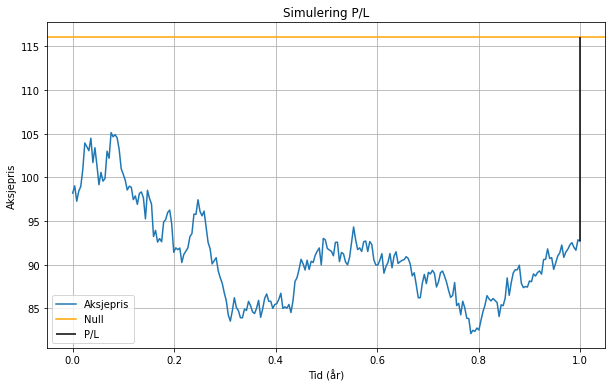

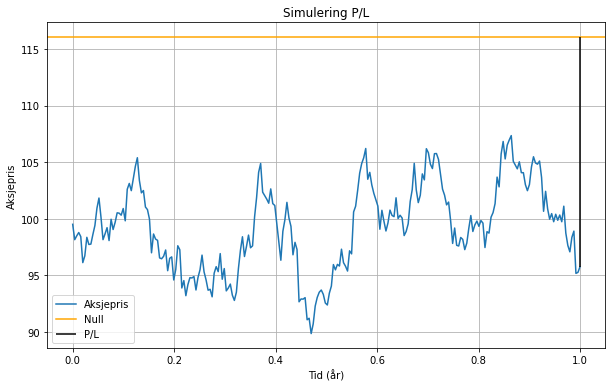

In [2]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


# Parametere
S0 = 100  # startpris på aksje  
mu = 0.05   # drift, forventet gevinst
sigma = 0.2   # volatilitet 
T = 1     # time to maturity, målt i år    
N = 252 # antall børsdager i et år. Gir en mer realistisk simulering.      
dt = T / N   # tidssteg
n = 3  # antall simuleringer

t = np.linspace(0, T, N)


paths = np.zeros((n, N))
for i in range(n):
    
    Z = np.random.normal(0, 1, N)
    W = np.cumsum(np.sqrt(dt) * Z)  
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    paths[i] = S

   
    def black_scholes(S, K, t_maturity, r, sigma):
        d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * t_maturity) / (sigma * math.sqrt(t_maturity))
        d2 = d1 - sigma * math.sqrt(t_maturity)

        premium = S * norm.cdf(d1) - K * math.exp(-r * t_maturity) * norm.cdf(d2)
        return premium

    # Parametre for Black-Scholes
    S = 100      # startpris på aksje
    K = 110      # strike price
    t_maturity = 1  # time to maturity, målt i år
    r = 0.05     # risikofri rente, forventet vekst
    sigma = 0.2  # volatilitet

    premium = black_scholes(S, K, t_maturity, r, sigma)
    

    
    plt.figure(figsize=(10, 6))
    plt.plot(t, paths[i], label='Aksjepris')
    plt.axhline(y=K + premium, color='orange', linestyle='-', label='Null') #Lager horisontal linje på premium+strike price
    plt.vlines(t[-1], K + premium, paths[i, -1], color='black', linestyle='-', label='P/L') #Lager vertikal linje som representerer P/L
    plt.title('Simulering P/L')
    plt.xlabel('Tid (år)')
    plt.ylabel('Aksjepris')
    plt.grid(True)
    plt.legend()
print('premium:', round(premium,2))

plt.show()


Vi kan plotte aksjepris utviklingen med den rettferdige prisen på opsjonen. Da kan vi se om simuleringen vil ende i profitt eller tap(P/L). I denne simuleringen har aksjen en startpris på 100 kroner, strike price på 110 og opsjonen koster 6.04 kroner.  For at opsjonen skal ende i gevinst, må aksjeprisen på siste dag være mer enn strikeprisen og det du betalte for opsjonen. Det vil da være cirka 116 kroner.  Dette er representert av den gule streken. Vi plotter 3 forskjellige grafer for å visualisere forskjellige scenarior. Hvis aksjeprisen ender over den gule streken, er det differansen mellom den avsluttende aksjeprisen og den gule streken som vil være gevinsten. Naturligvis, vil det være motsatt(tap) for alt under den gule streken. 

La oss si man kjøper en opsjon der man har rett til å kjøpe aksjen for 110kr om 1 år for 5 kroner. Etter 1 år har aksjen en pris på 120. Hvis man da benytter seg av retten til å kjøpe aksjen, kan man kjøpe for 110. Da sitter du igjen med en gevinst på 10 kroner. Så må du trekke fra det du kjøpte opjsonen for, altså 5 kroner. Til slutt, har du da en profitt på 5 kroner. Hvis aksjeprisen ikke blir mer enn strike price, vil man naturligvis aldri benytte seg av muligheten til å kjøpe, da det er billigere å kjøpe aksjen for normal pris. Da ender man opp med å tape det man kjøpte opsjonen for. Det tredje tilfellet vil være at man benytter seg av retten til å kjøpe aksjen for å minimere tapet. Man taper mindre enn det det kostet å kjøpe opsjonen. I simuleringen er det relevant og ha kunnskap om dette. Hvis aksjeprisen er langt under strike prise, vil det se ut som tapet er enormt. Dette stemmer ikke, da som nevnt man aldri ville benyttet seg av opsjonen hvis aksjeprisen er under strike price. 

Black-Scholes modellen blir ofte brukt til å hedge en portejøle. Hedging vil si å forsøke å redusere risikoen for økonomisk tap ved å ta en motposisjon til noe du allerede eier. Hvis man eier en aksje, kan man f.eks kjøpe en put-opsjon på samme aksje. Hvis aksjen synker i verdi vil man tape penger på aksjen man eier, men tjene penger på put-opsjonen. På lik måte, hvis man selger en call-opsjon, kan man kjøpe opp aksjer for å hedge. I simuleringen vår kan vi se hvordan aksjeprisen kan variere mye. En opsjon vil da være et tryggere valg, kontra å eie aksjen. 


Visualiseringen under viser hvordan P/L utvikler seg, der strike price er 110 og premium(prisen på opsjonen) er 5. 

# Visualiseringsdiagram for P/L

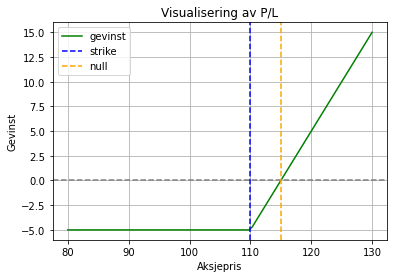

In [3]:
strike = 110
premium = 5
S = np.linspace(80, 130, 100)
profitt = np.maximum(S - strike, 0) - premium

plt.plot(S, profitt, label='gevinst', color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(strike, color='blue', linestyle='--', label='strike')
plt.axvline(strike + premium, color='orange', linestyle='--', label='null')
plt.title('Visualisering av P/L')
plt.xlabel('Aksjepris')
plt.ylabel('Gevinst')
plt.legend()
plt.grid(True)
plt.show()


I denne visualisering kan vi se de forskjellige situasjonene. Hvis aksjeprisen er under strike price, representert av den blå streken, vil det aldri lønne seg å bruke retten til å kjøpe for strike price. Da forfaller opsjonen og du taper det du betalte(premium). Dersom aksjeprisen er mellom strike price og strike price + premium, vil det lønne seg å bruke retten til å kjøpe for å minimere tapet. Alt over strike price + premium vil være profitt. Denne visualiseringen viser også hvordan opsjoner reduserer risiko for kjøper, da man maksimalt kan tape premium, men har teorisk uendelig gevinst. Dette kan sammenlignes med å kjøpe en aksje. Da har man mye høyere risiko. Hvis aksjen plutselig halveres i pris har du tapt halvparten av pengene dine. Hvis du hadde hatt en opsjon hadde du bare tapt premium selv om aksjen mistet 50% av verdien sin. 

## Bevis for Black-Scholes modellen

Vi skal nå bevise at Black-Scholes modellen gir oss den rettferdige opsjonsprisen med å kjøre mange simuleringer med geometrisk brownsk bevegelse. Da vil gjennomsnitts P/L bli nær 0 med opsjons verdien(premium) vi får fra Black-Scholes modellen. Når P/L er tilnærmet lik 0 vil kjøper og selger av opsjonen ha de samme forutsetningene. Dette er da den rettferdige prisen. 

In [4]:
import numpy as np
from scipy.stats import norm
import math

# Parametere
S0 = 100       
K = 105        
T = 1          
r = 0.05       
sigma = 0.2    
n = 100000     


Z = np.random.normal(0, 1, n)
S_T = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)


gevinst = np.maximum(S_T - K, 0)


diskontert_gevinst = np.exp(-r * T) * gevinst
gjennomsnitt_diskontert_gevinst = np.mean(diskontert_gevinst)


def black_scholes(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


premium = black_scholes(S0, K, T, r, sigma)


print("Premium:", round(premium, 3))
print("Gjennomsnittlig diskontert gevinst:", round(gjennomsnitt_diskontert_gevinst, 3))
print("Forskjell (P/L):", round(gjennomsnitt_diskontert_gevinst - premium, 3))


Premium: 8.021
Gjennomsnittlig diskontert gevinst: 8.043
Forskjell (P/L): 0.021


Fra utskriften ser vi at opsjonens pris fra Black-Scholes formelen er svært nær den gjennomsnittlige gevinsten fra simuleringen av aksjens sluttpris. Dette samsvarer med teorien om at verdien av en opsjon er lik den forventede gevinsten under en risikonøytral prising. Det er viktig å påpeke noe sentralt vi gjør i koden, nemlig å diskontere. Å diskontere vil si å beregne beløpet som må investeres i dag for å oppnå en bestemt verdi i fremtiden. Dette er viktig fordi tid har verdi. Hvis man investerer penger i dag kan man anta at det vil vokse. For eksempel hvis du vet du vil motta 105 kroner om ett år, så er ikke dette verdt 105 kroner i dag, fordi du kunne investert en lavere sum i dag og vokst den til 105 kroner i løpet av året, f.eks. gjennom en amerikansk statsobligasjon. Diskonteringsfaktoren $e^{-rT}$ gir oss hvor mye et fremtidig beløp er verdt i dag. Denne diskonteringsfaktoren er allerede bygget inn i Black-Scholes formelen, der strike faktoren $K$ blir ganget med $e^{-rT}$. Hvis man ikke diskonterer gevinsten ville man fått en urealistisk høy gevinst. 

# Løser differensiallikning med Eulers metode

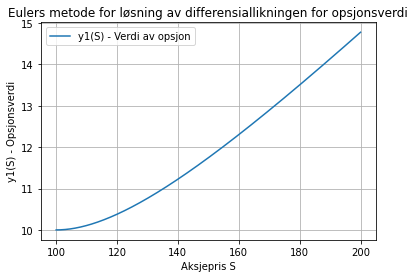

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parametre
r = 0.05       # Risikofri rente
sigma = 0.2    # Volatilitet
S0 = 100       # Startverdi for aksjeprisen
S_max = 200    # Maksimal aksjepris
N = 500        # Antall tidssteg
dt = (S_max - S0) / N  


S = np.linspace(S0, S_max, N)
y1 = np.zeros(N) 
y2 = np.zeros(N) 


y1[0] = 10  
y2[0] = 0   


for i in range(1, N):
    dy1 = y2[i-1] * dt
    dy2 = (r * y1[i-1] - r * S[i-1] * y2[i-1]) * (2 / (sigma**2 * S[i-1]**2)) * dt
    
    
    y1[i] = y1[i-1] + dy1
    y2[i] = y2[i-1] + dy2


plt.plot(S, y1, label='y1(S) - Verdi av opsjon')
plt.xlabel('Aksjepris S')
plt.ylabel('y1(S) - Opsjonsverdi')
plt.title('Eulers metode for løsning av differensiallikningen for opsjonsverdi')
plt.grid(True)
plt.legend()
plt.show()


I denne simuleringen løser vi differensiallikningene for opsjonens forventede verdi under risikonøytral prising ved hjelp av Eulers metode. Risikonøytral prising innebærer at man antar at enhver investering kun forventer avkastning tilsvarende den risikofrie renten, og ikke krever ekstra gevinst for å ta risiko. Denne forutsetningen gjør at vi kan beregne opsjonsverdien matematisk

I simuleringen er startverdien til opsjonsprisen satt til en vilkårlig verdi, y1[0] = 10. Dette er ikke ment som en faktisk pris på opsjonen ved aksjepris 100, men kun som en numerisk startbetingelse som gjør det mulig å bruke Eulers metode. Vi kan ikke gi et realistisk svar på opsjonsprisen. Det er fordi differensiallikningen er tidløs.  Poenget med simuleringen er derfor ikke å finne den eksakte prisen på opsjonen, men heller å illustrere hvordan løsningen til differensiallikningen utvikler seg med økende aksjepris. Simuleringen viser oss at opsjonsverdien stiger når aksjeprisen stiger. Dette gir mening da opsjonen vil bli mer verdifull når aksjeprisen stiger. Når aksjeprisen stiger, vil det være en høyere gevinst i opsjonen, hvis ikke opsjonen endrer verdi. Hvis opsjonsprisen skal være rettferdig, må den da også stige når aksjeprisen stiger. 

# Konklusjon

I dette prosjektet har jeg utforsket sammenhengen mellom geometrisk brownsk bevegelse og Black-Scholes-modellen for prising av europeiske opsjoner. Ved å simulere aksjeprisens utvikling gjennom geometrisk brownsk bevegelse og sammenligne sluttverdiene med opsjonens rettferdige pris beregnet fra Black-Scholes-formelen, fant jeg ut at den teoretiske opsjonsprisen var tilnærmet lik den diskonterte gevinsten fra den geometriske brownske simuleringen. Dette viser at Black-Scholes-modellen gir oss et matematisk svar for å prise opsjoner under antakelsen om normal fordelte verdier, konstant drift og volatilitet. Jeg har drøftet forutsetninger og begrensninger ved hver modell. Differensiallikingen ble løst med Eulers metode. Prosjektet har vist hvordan stokatiske prosesser er sentralt i simuleringer innen finans og hvordan numeriske metoder som Eulers metode kan bli brukt for å løse ordinære differensiallikinger.  
